In [20]:
import sys
sys.path.append('../../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import plots
from packages import general, bh

In [21]:
num_particles = 1000

n_crits = np.arange(2, 30, 4)

theta = 0.5
terms = 3

In [22]:
particles = [general.Particle(mass_like=True) for _ in range(num_particles)]

times = []

for n_crit in n_crits:
    print(f'n_crit: {n_crit}')
    method = bh.BH(particles, theta, terms, n_crit)
    time = %timeit -o method.do_method()
    times.append(time)

n_crit: 2
2.2 s ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
n_crit: 6
1.75 s ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
n_crit: 10
1.66 s ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
n_crit: 14
1.68 s ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
n_crit: 18
1.73 s ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
n_crit: 22
1.88 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
n_crit: 26
1.91 s ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
averages = [time.average for time in times]
stdevs = [time.stdev for time in times]

In [24]:
FILE_PATH = 'data/n_crit.npz'
np.savez(FILE_PATH,
    num_particles=num_particles,
    theta=theta,
    terms=terms,
    averages=averages,
    stdevs=stdevs,
    n_crits=n_crits
)

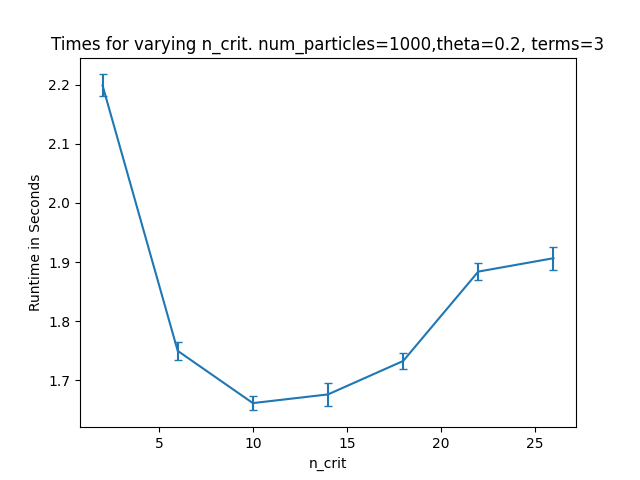

In [30]:
FILE_PATH = 'data/n_crit2.npz'
fig = plots.n_crit(FILE_PATH)